Anomaly Detection Algorithm using Gaussian Distribution
---



In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import load_diabetes

Auxiliary functions

In [119]:
def get_mean(X: np.ndarray) -> np.ndarray:
  '''
  Calculate mean of each matrix's column.
  '''
  return np.sum(X, axis=0)/X.shape[0]

def get_var(X: np.ndarray, X_mean: np.ndarray) -> np.ndarray:
  '''
  Calcultate the variance of each matrix's column.
  '''
  return sum((X - X_mean)**2)/X.shape[0]

def get_probability(X: np.ndarray, X_mean: np.ndarray, X_var: np.ndarray) -> float:
  '''
  Calculate the gaussian distribution probability on a point X by a given mean and variance.
  '''
  exponent = -((X - X_mean)**2)/(2 * X_var)
  return np.prod((1 / (np.sqrt(2 * np.pi * X_var)) * np.exp(exponent)))

In [120]:
# main algorithm

def anomaly_detection(X_test:np.ndarray, X: np.ndarray, epslon:float) -> list[bool]:
  '''
  Detects outliers on X_test based on the productory of each columns values probability, by a given threshold epslon.
  '''
  X_mean = get_mean(X)
  X_std = get_var(X, X_mean)

  y = []
  for i in range(X_test.shape[0]):
    pred = get_probability(X_test[i,:], X_mean, X_std)

    if pred < epslon:
      y.append(True)
    else:
      y.append(False)

  return y

Testing:

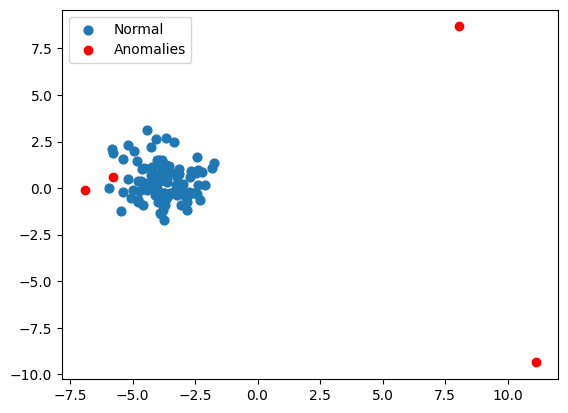

In [121]:
# generate points distributed around a center
X, y = make_blobs(n_samples=100, centers=1, random_state=26)

# set seed
np.random.seed(26)

# generate outliers
anomalies = np.random.uniform(-15, 15, size=(4, 2))

# plot points
plt.scatter(X[:, 0], X[:, 1], s=40, label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies')
plt.legend()
plt.show()

In [122]:
# run algorithm on anomalies set
anomaly_detection(anomalies, X, 0.01)

[False, True, True, True]

True = anomaly, False = not an anomaly.
On the anomalies set, results expected are True for all points.

After a few tries, epslon = 0.01 showed the best trade-off between precision and recall.

In [123]:
# run algorthm on train set (only normal points)
Y = anomaly_detection(X, X, 0.01)

print(f'Results found:\nTrue: {Y.count(True)}, False: {Y.count(False)}')

Results found:
True: 6, False: 94


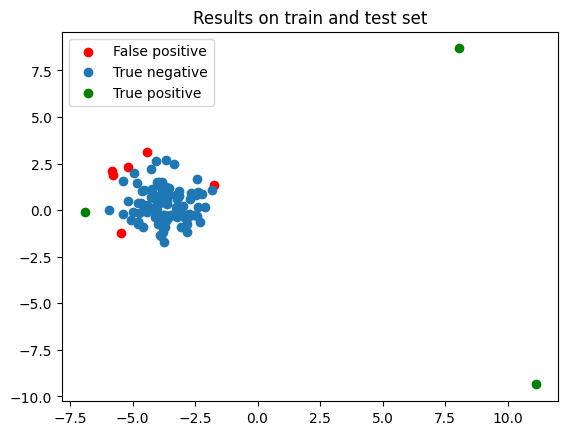

In [124]:
# get false positives on train data
true_index = [i for i, value in enumerate(Y) if value]
fp = X[true_index]

# get true negatives
mask = np.ones(len(X),  dtype=bool)
mask[true_index] = False
tn = X[mask]

# plot predictions on train and anomaly data
plt.scatter(fp[:, 0], fp[:,1], c='red', label='False positive')
plt.scatter(tn[:, 0], tn[:,1], label='True negative')
plt.scatter(anomalies[1:, 0], anomalies[1:, 1], c='green', label='True positive')
plt.legend()
plt.title('Results on train and test set')
plt.show()

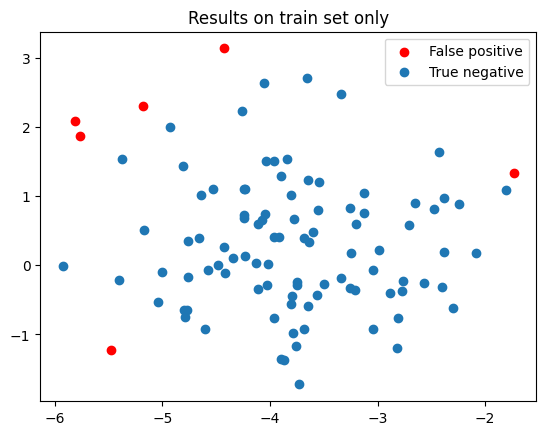

In [126]:
# plot train data
plt.scatter(fp[:, 0], fp[:,1], c='red', label='False positive')
plt.scatter(tn[:, 0], tn[:,1], label='True negative')
plt.legend()
plt.title('Results on train set only')
plt.show()